In [1]:
#Import the relevant libraries
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:


# Call the dataset
dataset_path = 'Credit_Card_Default_Clean.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
data.head()

# Verify data types after conversion
print(data.dtypes)


ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object


In [3]:
#Partition data into X and Y

y = data['default']
X = data.drop('default', axis = 1)

X.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

LOGISTIC REGRESSION

In [5]:
#Create an instance
lr = LogisticRegression(max_iter = 1000, random_state=42)

#Fit model on training data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
y_test_predicted = lr.predict(X_test)

CONFUSION MATRIX

In [7]:
lr.classes_

array([0, 1], dtype=int64)

In [8]:
cm = confusion_matrix(y_test, y_test_predicted, labels = lr.classes_)
print(cm)

[[5868    0]
 [1631    1]]


condition: default payment (Yes = 1, No = 0)

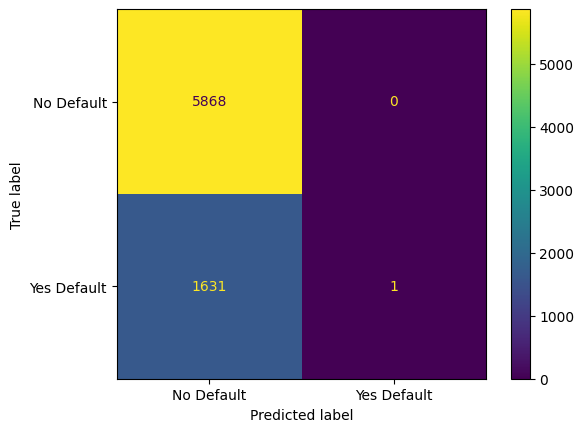

In [9]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['No Default', 'Yes Default'])
cm_disp.plot()